In [1]:
#pip install ucimlrepo

In [2]:
#pip install bnlearn

In [3]:
#pip install d3blocks

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import bnlearn as bn
import os
from IPython.display import IFrame


In [4]:
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 


In [5]:

# Assuming wine_quality.data is a numpy array or a list of lists
df = pd.DataFrame(wine_quality.data.original)


In [6]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [7]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [10]:
col_list = list(df.columns)
col_list.pop()
col_list.pop()
col_list

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [11]:
# Discretize the DataFrame using qcut
for col in col_list:
    df[col] = pd.qcut(df[col], q=10, duplicates='drop')



In [12]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,"(7.2, 7.5]","(0.59, 1.58]","(-0.001, 0.14]","(1.7, 2.0]","(0.073, 0.086]","(9.0, 15.0]","(30.0, 62.2]","(0.9974, 0.9984]","(3.42, 4.01]","(0.54, 0.58]","(9.1, 9.4]",5,red
1,"(7.5, 7.9]","(0.59, 1.58]","(-0.001, 0.14]","(2.3, 3.0]","(0.086, 0.611]","(24.0, 29.0]","(62.2, 89.0]","(0.9966, 0.9974]","(3.17, 3.21]","(0.63, 0.72]","(9.6, 9.9]",5,red
2,"(7.5, 7.9]","(0.59, 1.58]","(-0.001, 0.14]","(2.0, 2.3]","(0.086, 0.611]","(9.0, 15.0]","(30.0, 62.2]","(0.9966, 0.9974]","(3.25, 3.3]","(0.63, 0.72]","(9.6, 9.9]",5,red
3,"(8.8, 15.9]","(0.27, 0.29]","(0.49, 1.66]","(1.7, 2.0]","(0.073, 0.086]","(15.0, 19.0]","(30.0, 62.2]","(0.9974, 0.9984]","(3.13, 3.17]","(0.54, 0.58]","(9.6, 9.9]",6,red
4,"(7.2, 7.5]","(0.59, 1.58]","(-0.001, 0.14]","(1.7, 2.0]","(0.073, 0.086]","(9.0, 15.0]","(30.0, 62.2]","(0.9974, 0.9984]","(3.42, 4.01]","(0.54, 0.58]","(9.1, 9.4]",5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,"(6.0, 6.3]","(0.18, 0.21]","(0.26, 0.29]","(1.3, 1.7]","(0.036, 0.04]","(19.0, 24.0]","(89.0, 105.0]","(0.9907, 0.9918]","(3.25, 3.3]","(0.48, 0.51]","(11.1, 11.5]",6,white
6493,"(6.5, 6.8]","(0.29, 0.32]","(0.34, 0.37]","(7.1, 9.6]","(0.044, 0.047]","(54.0, 289.0]","(165.0, 188.0]","(0.9949, 0.9957]","(3.13, 3.17]","(0.45, 0.48]","(9.4, 9.6]",5,white
6494,"(6.3, 6.5]","(0.21, 0.24]","(0.14, 0.23]","(0.599, 1.3]","(0.04, 0.044]","(29.0, 33.0]","(105.0, 118.0]","(0.9918, 0.9928]","(2.7190000000000003, 3.02]","(0.45, 0.48]","(9.1, 9.4]",6,white
6495,"(3.799, 6.0]","(0.27, 0.29]","(0.29, 0.31]","(0.599, 1.3]","(0.008, 0.031]","(19.0, 24.0]","(105.0, 118.0]","(0.987, 0.9907]","(3.3, 3.35]","(0.37, 0.41]","(12.3, 14.9]",7,white


In [13]:
model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')


[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


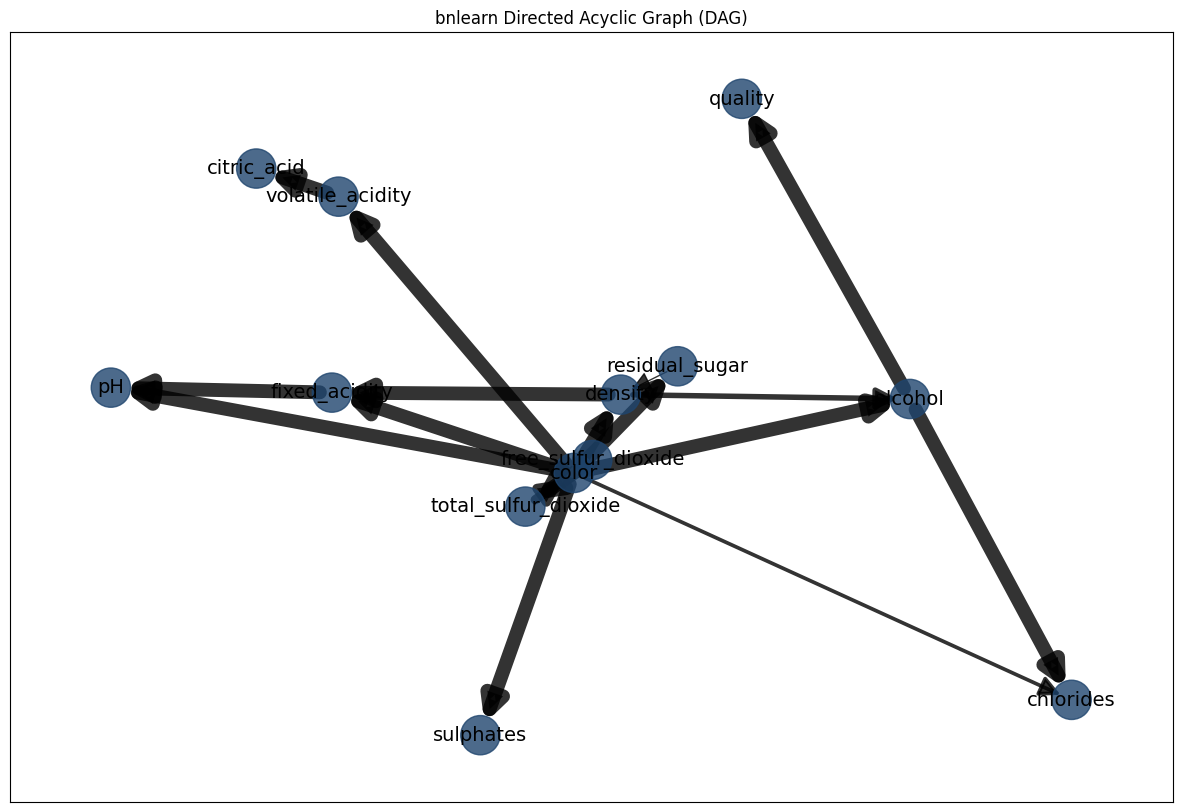

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'fixed_acidity': array([-0.34977241,  0.04087173]),
  'volatile_acidity': array([-0.33940708,  0.63628168]),
  'citric_acid': array([-0.4677971 ,  0.72161587]),
  'residual_sugar': array([0.18944449, 0.12082957]),
  'chlorides': array([ 0.80361199, -0.89263791]),
  'free_sulfur_dioxide': array([ 0.05609339, -0.16397519]),
  'total_sulfur_dioxide': array([-0.04813298, -0.30544401]),
  'density': array([0.10060135, 0.03469514]),
  'pH': array([-0.69444759,  0.05596927]),
  'sulphates': array([-0.11832804, -1.        ]),
  'alcohol': array([0.55144545, 0.02150594]),
  'quality': array([0.28932977, 0.93347867]),
  'color': array([ 0.02735876, -0.20319076])},
 'G': <networkx.classes.digraph.DiGraph at 0x7fdae1751a20>,
 'node_properties': {'fixed_acidity': {'node_color': '#1f456e',
   'node_size': 800},
  'volatile_acidity': {'node_color': '#1f456e', 'node_size': 800},
  'citric_acid': {'node_co

In [14]:
model = bn.independence_test(model, df, prune=True)
bn.plot(model)


In [75]:
cur_cwd = os.getcwd()
# Note this must be stored in the directory as the notebook in Jupyter lab in order to render correctly
outfile = f"{cur_cwd}/outputfile.html"
title = "Test"

node_properties = bn.get_node_properties(model)
node_properties['quality']['node_color']='#8A0707'
bn.plot(model, title = title, node_properties=node_properties, interactive=True, params_interactive={'minmax_distance': [100, 250], 'figsize': (1500, 800), 'notebook': True, 'font_color': 'node_color', 'bgcolor': '#ffffff', 'show_slider': True, 'filepath': outfile})


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Converting adjacency matrix into source-target..
[d3blocks] >INFO> Number of unique nodes: 13


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Slider range is set to [0, 10]


[d3blocks] >INFO> Write to path: [/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/tmpa9b19ixe/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/p0/qbnst5tj08g1z35zyllsm5vc0000gn/T/tmpa9b19ixe/d3graph.html]
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Converting source-target into adjacency matrix..
[d3blocks] >INFO> Making the matrix symmetric..
[d3blocks] >INFO> Number of unique nodes: 13
[d3blocks] >INFO> Slider range is set to [0, 10]
[d3blocks] >INFO> Write to path: [/Users/jonas/Documents/Uni/Erasmus/Data Engineering/GitHub/In_vino_veritas/drafts/outputfile.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/Users/jonas/Documents/Uni/Erasmus/Data Engineering/GitHub/In_vino_veritas/drafts/outputfile.html]


{'fig': '/Users/jonas/Documents/Uni/Erasmus/Data Engineering/GitHub/In_vino_veritas/drafts/outputfile.html',
 'ax': '/Users/jonas/Documents/Uni/Erasmus/Data Engineering/GitHub/In_vino_veritas/drafts/outputfile.html',
 'pos': None,
 'G': <networkx.classes.digraph.DiGraph at 0x7fdaf5027eb0>,
 'node_properties': {'fixed_acidity': {'node_color': '#1f456e',
   'node_size': 10},
  'volatile_acidity': {'node_color': '#1f456e', 'node_size': 10},
  'citric_acid': {'node_color': '#1f456e', 'node_size': 10},
  'residual_sugar': {'node_color': '#1f456e', 'node_size': 10},
  'chlorides': {'node_color': '#1f456e', 'node_size': 10},
  'free_sulfur_dioxide': {'node_color': '#1f456e', 'node_size': 10},
  'total_sulfur_dioxide': {'node_color': '#1f456e', 'node_size': 10},
  'density': {'node_color': '#1f456e', 'node_size': 10},
  'pH': {'node_color': '#1f456e', 'node_size': 10},
  'sulphates': {'node_color': '#1f456e', 'node_size': 10},
  'alcohol': {'node_color': '#1f456e', 'node_size': 10},
  'quality

In [76]:
#bn.plot(model)

In [77]:
display(IFrame(outfile, width=800, height=600))